In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [ ]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [ ]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [ ]:
df.rename(columns ={'Monthly milk production: pounds per cow. Jan 62 ? Dec 75': 'Milk produced'}, inplace=True)

In [ ]:
df.head()

,Month,Milk produced
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [ ]:
df.tail()

,Month,Milk produced
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [ ]:
df.drop(168,axis = 0,inplace = True)

In [ ]:
df.head(30)

,Month,Milk produced
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
5,1962-06,697.0
6,1962-07,640.0
7,1962-08,599.0
8,1962-09,568.0
9,1962-10,577.0


In [ ]:
df.dtypes

Month             object
Milk produced    float64
dtype: object

In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Milk produced
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Milk produced
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk produced,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


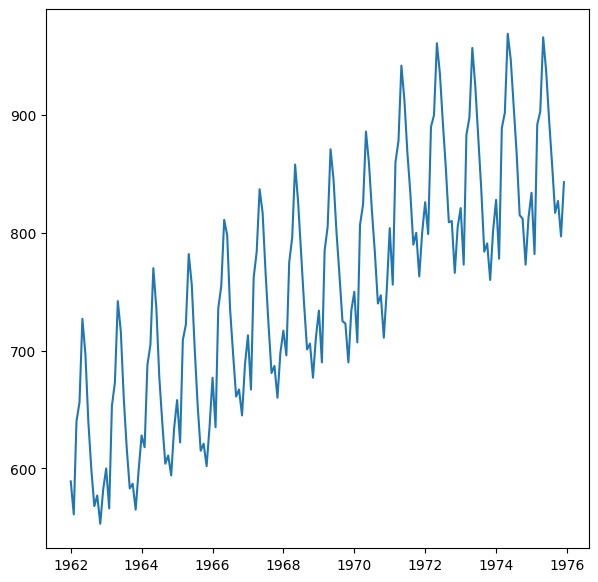

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(df['Milk produced']) ### lineplot

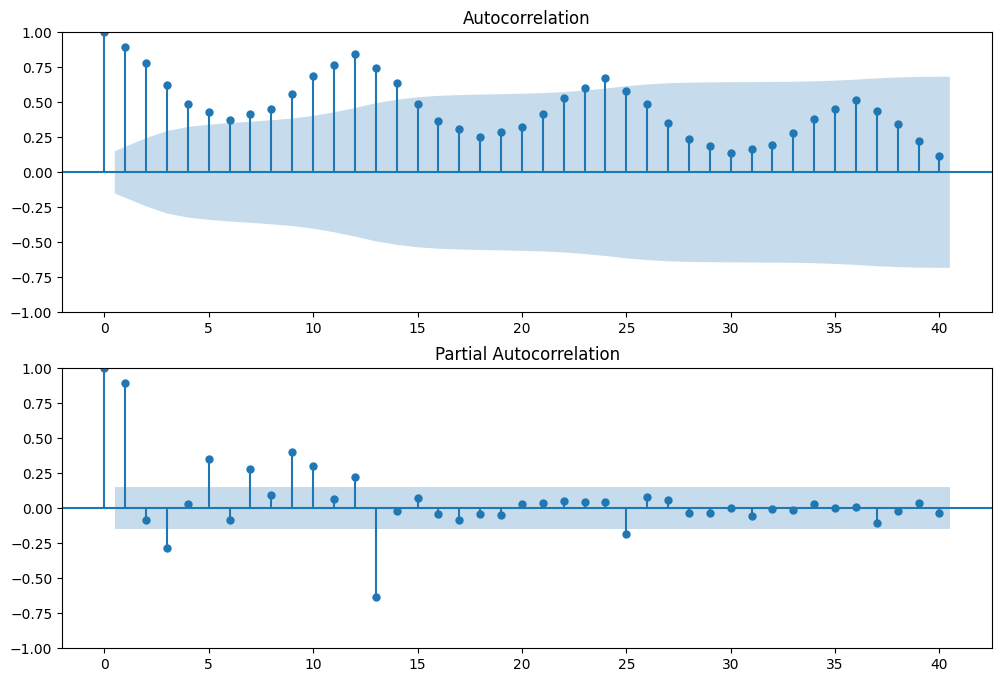

In [ ]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Milk produced'], lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Milk produced'], lags = 40, ax = ax2)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose #### classical decomposition

In [ ]:
decomposition = seasonal_decompose(df['Milk produced'])

<Figure size 640x480 with 0 Axes>

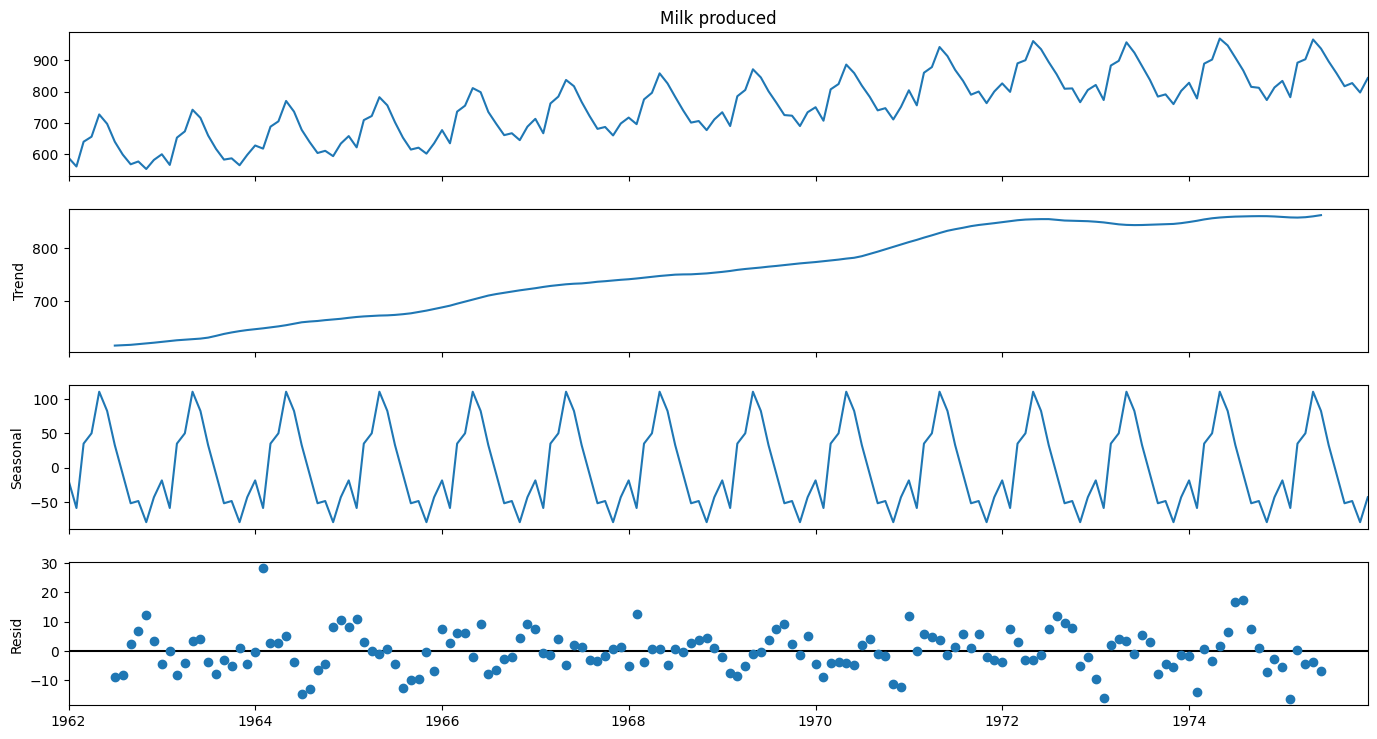

In [ ]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [ ]:
from statsmodels.tsa.stattools import adfuller ### This function does the augumented dickey fuller

In [ ]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series) #Hypothesis testing
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] < 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [ ]:
result = adf_check(df['Milk produced']) ## Expecting -  Non stationary

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221308
p-value : 0.6274267086030311
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [ ]:
#### Fit SARIMA
#### p, d, q, P, D, Q
#### p,q,P,Q are hyperparameters ### we will tune this
#### d, D are differencing to convert non stationary timeseries to a stationary time series

In [ ]:
df['Milk produced'] #YT

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Name: Milk produced, Length: 168, dtype: float64

In [ ]:
df['Milk produced'].shift(1) #YT-1

Month
1962-01-01      NaN
1962-02-01    589.0
1962-03-01    561.0
1962-04-01    640.0
1962-05-01    656.0
              ...  
1975-08-01    896.0
1975-09-01    858.0
1975-10-01    817.0
1975-11-01    827.0
1975-12-01    797.0
Name: Milk produced, Length: 168, dtype: float64

In [ ]:
df['Milk produced'].shift(12).head(20) ### YT-12

Month
1962-01-01      NaN
1962-02-01      NaN
1962-03-01      NaN
1962-04-01      NaN
1962-05-01      NaN
1962-06-01      NaN
1962-07-01      NaN
1962-08-01      NaN
1962-09-01      NaN
1962-10-01      NaN
1962-11-01      NaN
1962-12-01      NaN
1963-01-01    589.0
1963-02-01    561.0
1963-03-01    640.0
1963-04-01    656.0
1963-05-01    727.0
1963-06-01    697.0
1963-07-01    640.0
1963-08-01    599.0
Name: Milk produced, dtype: float64

In [ ]:
#### Sesonal differencing YT - YT-12 ### Removing/reducing the seasonality

<Axes: xlabel='Month'>

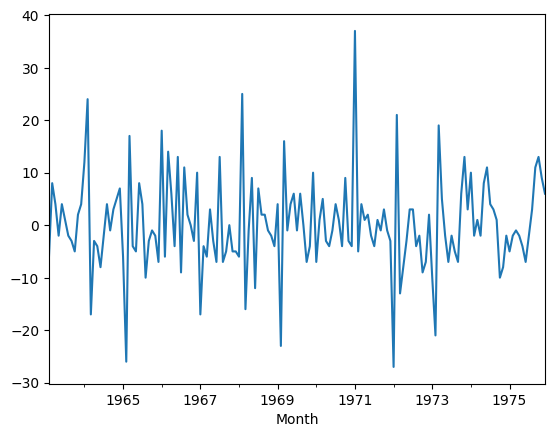

In [ ]:
  #### First order normal differencing

seasonality_removed = df['Milk produced'] - df['Milk produced'].shift(12) #### First order seasonal differencing (Yt)-(Yt-12)

trend_seasonality_removed = seasonality_removed - seasonality_removed.shift(1) #### first order normal differencing

trend_seasonality_removed = trend_seasonality_removed.dropna()

trend_seasonality_removed.plot()

In [ ]:
print(adf_check(trend_seasonality_removed)) ### first order seasonal differencing and first order trend differencing

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921981
p-value : 1.865423431878848e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None


In [ ]:
#d=1, D=1, #p,P,q,Q --> Non stationary/stationary

In [ ]:
q=1
# Q - Seasonal lags

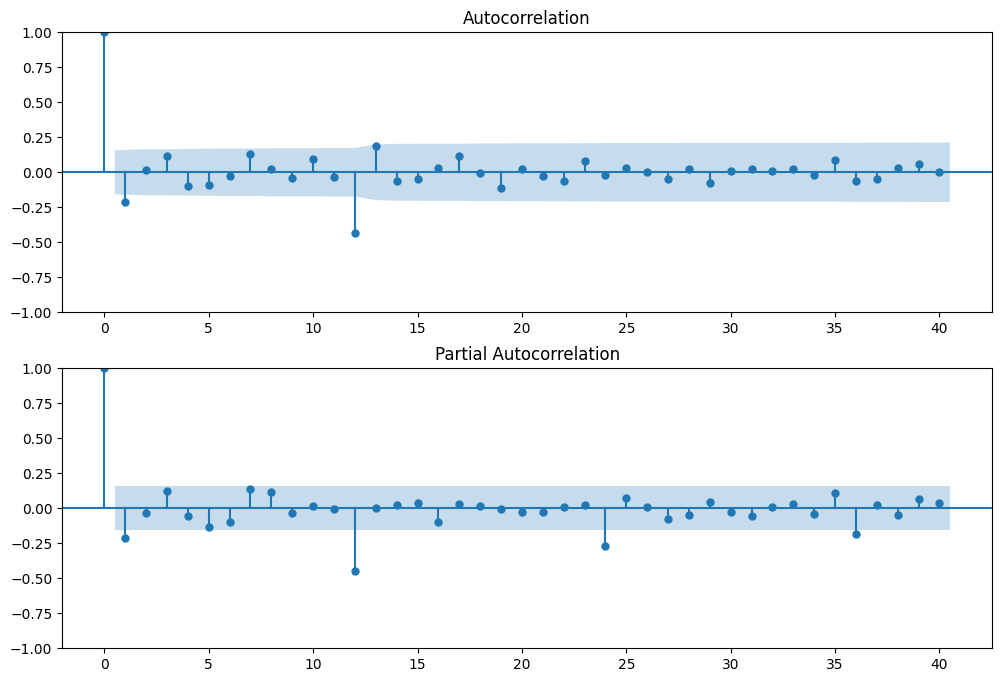

In [ ]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(trend_seasonality_removed,lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(trend_seasonality_removed,lags = 40, ax = ax2)

In [ ]:
#### SARMA(1,1,3,1) ON THE WEAKLY STATIONARY TIMESERIES
##### DO REVERSE DIFFERENCING AND GET THE ORIGINAL FORECAST

In [ ]:
#d=1
#D=1
#p=1
#P=3
#q=1
#Q=1

In [ ]:
def rmse(series1, series2):
  error = series1-series2
  se_error = error**2
  rmse_ = np.sqrt(np.mean(se_error))
  return rmse_

In [ ]:
def mape(actual, predicted):
  error = actual-predicted
  abs_error = np.absolute(error)
  percent_abs_error = (abs_error/actual)*100
  mape_ = np.mean(percent_abs_error)
  return mape_

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Milk produced'],
                                  order = (1,1,1),
                                  seasonal_order = (3,1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model.fit() ## Model training happens and it learns coefficient
#print(results.summary())
#print('\n\n')
#print('RMSE {}'.format(rmse(results.fittedvalues, df['Milk produced'])))
#print('MAPE {}'.format(mape(df['Milk produced'], results.fittedvalues)))

In [ ]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Milk produced   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -527.334
Date:                            Sun, 07 Apr 2024   AIC                           1068.669
Time:                                    04:37:40   BIC                           1089.973
Sample:                                01-01-1962   HQIC                          1077.322
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1344      0.393     -0.342      0.733      -0.905       0.636
ma.L1         -0.0716      0.391   

In [ ]:
results.fittedvalues #### Prediction on the data the model was trained on

Month
1962-01-01      0.000000
1962-02-01    588.995291
1962-03-01    561.001081
1962-04-01    639.998592
1962-05-01    655.999933
                 ...    
1975-08-01    856.224128
1975-09-01    808.568369
1975-10-01    819.230970
1975-11-01    788.815674
1975-12-01    835.027349
Length: 168, dtype: float64

In [ ]:
results

<Axes: xlabel='Month'>

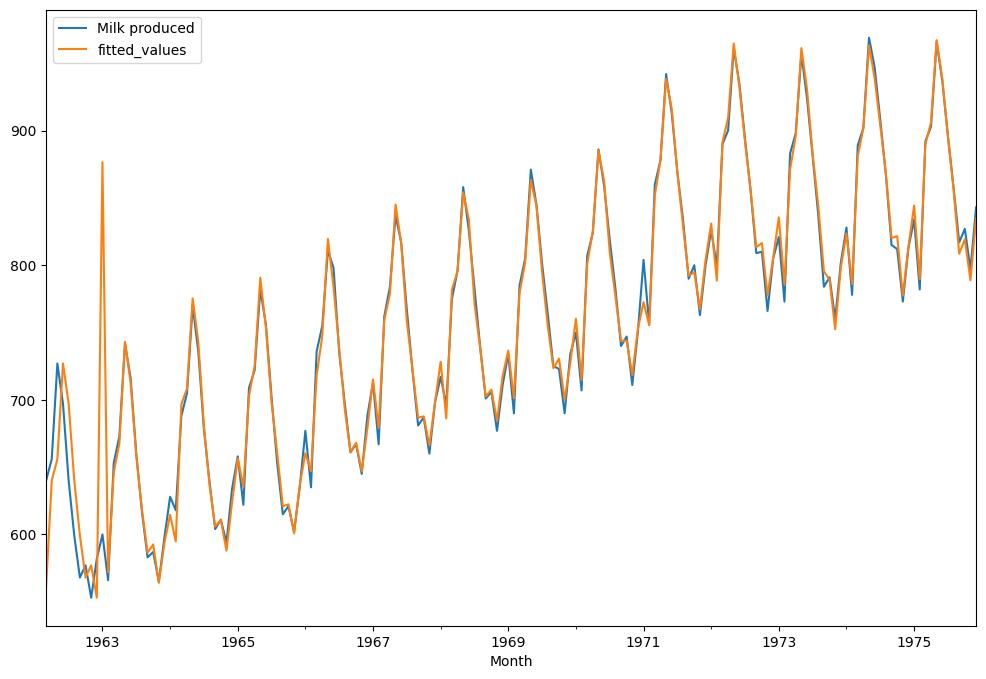

In [ ]:
##### FORECAST####

df['fitted_values'] = results.fittedvalues

temp_df = df.iloc[2:, :]

temp_df[['Milk produced', 'fitted_values']].plot(figsize = (12, 8))


In [ ]:
results.forecast(3) #### Forecast for future 12 dates

1976-01-01    865.587657
1976-02-01    822.108480
1976-03-01    926.580408
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
################# Hyper Paramater tuning ############

p = range(0,4) #p = [0, 1, 2, 3]
d = [1] # d = 1
q = range(0,4) # q= [0,1,2,3]

P = range(0,2) # P = [0,1]
D = [1]
Q = range(0,2) # Q = [0,1]

freq=12

In [ ]:
import itertools

list(itertools.product(p, d, q))

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [ ]:
import itertools
import warnings

# Define the p, d and q parameters to take any value between 0 and 2
p = range(0,4)
q = range(0,4) ## experiment with p [0,1,2,3,4], q = [0,1,2,3,4]
d = [1]

seasonal_p = range(0,2)
seasonal_q = range(0,2)
seasonal_d = [1]
frequency=[12]

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))  ####output = [(0,1,0), (0,1,1), (0,1,2)]

seasonal_pdq = list(itertools.product(seasonal_p, seasonal_d, seasonal_q, frequency))  ###output= [(0,1,0,12), (0,1,1,12)]


# Generate all different combinations of seasonal p, q and q triplets
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,4), range(1,3), range(0,3)))]

print('Examples of parameter combinations for Seasonal ARIMA...')

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Milk produced'],
                                            order=param,
                                            seasonal_order=param_seasonal)

            results = mod.fit()

            print('SARIMA{}x{}12 - MAPE:{}'.format(param, param_seasonal, mape(df['Milk produced'], results.fittedvalues)))
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - MAPE:2.0577185005908287
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - MAPE:1.9743735950933297
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - MAPE:1.9768635324270794
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - MAPE:1.9728639412008995
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - MAPE:2.055024538749972
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - MAPE:1.961326002709314
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - MAPE:1.9724128691779927
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - MAPE:1.9577863246775078
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - MAPE:2.053712872351706
SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - MAPE:1.961795741214905
SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - MAPE:1.9748425466593946
SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - MAPE:1.9583488194073049
SARIMA(0, 1, 3)x(0, 1, 0, 12)12 - MAPE:2.0486466114426785
SARIMA(0, 1, 3)x(0, 1, 1, 12)12 - MAPE:1.95739791730912
SARIMA(0, 1, 3)x(1, 1, 0, 12)12 - MAPE:1.9686443305827002
SARIMA(0, 1, 3)x(1, 1, 1, 12)12 - MAPE:1.9553864817342839
SARIMA(1, 1, 0)x(0, 1

In [ ]:
forecasted_values = results.forecast(12)

In [ ]:
df = pd.concat([df, pd.DataFrame(forecasted_values)], axis=1)

In [ ]:
df.rename(columns ={'predicted_mean': 'forecasts'}, inplace=True)

In [ ]:
df

,Milk produced,forecasts
1962-01-01,589.0,NaN
1962-02-01,561.0,NaN
1962-03-01,640.0,NaN
1962-04-01,656.0,NaN
1962-05-01,727.0,NaN
...,...,...
1976-08-01,NaN,893.479961
1976-09-01,NaN,846.595758
1976-10-01,NaN,851.020524
1976-11-01,NaN,816.386753


<Axes: >

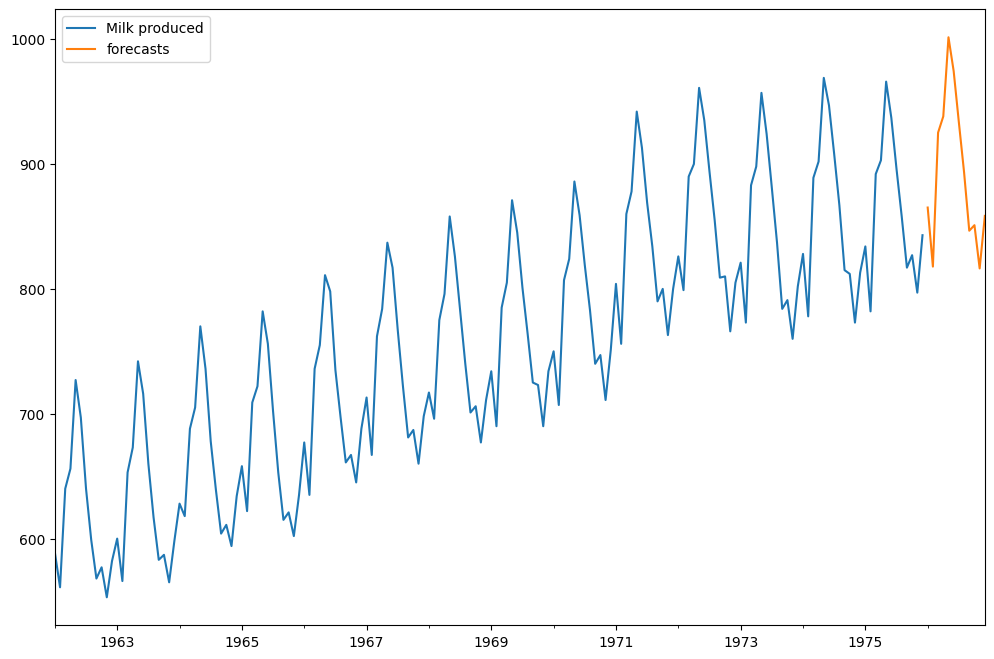

In [ ]:
df[['Milk produced','forecasts']].plot(figsize = (12, 8))

In [ ]:
df.tail()

,Milk produced,forecast
Month,,
1975-08-01,858.0,857.075366
1975-09-01,817.0,808.168621
1975-10-01,827.0,810.368969
1975-11-01,797.0,773.849742
1975-12-01,843.0,813.837229


In [ ]:
results.predict(start= 168, end = 180,dynamic = True)

1976-01-01     865.349739
1976-02-01     818.387706
1976-03-01     925.019489
1976-04-01     938.096591
1976-05-01    1001.238546
1976-06-01     973.830260
1976-07-01     932.477681
1976-08-01     892.889158
1976-09-01     846.994443
1976-10-01     852.166204
1976-11-01     818.130555
1976-12-01     860.408590
1977-01-01     883.596821
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,14)]

In [ ]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00')]

In [ ]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [ ]:
future_df = pd.concat([df,future_dates_df])

In [ ]:
future_df.tail(20)

,Milk produced,forecast
1975-06-01,937.0,939.207388
1975-07-01,896.0,897.642551
1975-08-01,858.0,857.075366
1975-09-01,817.0,808.168621
1975-10-01,827.0,810.368969
1975-11-01,797.0,773.849742
1975-12-01,843.0,813.837229
1976-01-01,NaN,NaN
1976-02-01,NaN,NaN
1976-03-01,NaN,NaN


In [ ]:
future_df.tail()

,Milk produced,forecast
1976-09-01,NaN,NaN
1976-10-01,NaN,NaN
1976-11-01,NaN,NaN
1976-12-01,NaN,NaN
1977-01-01,NaN,NaN


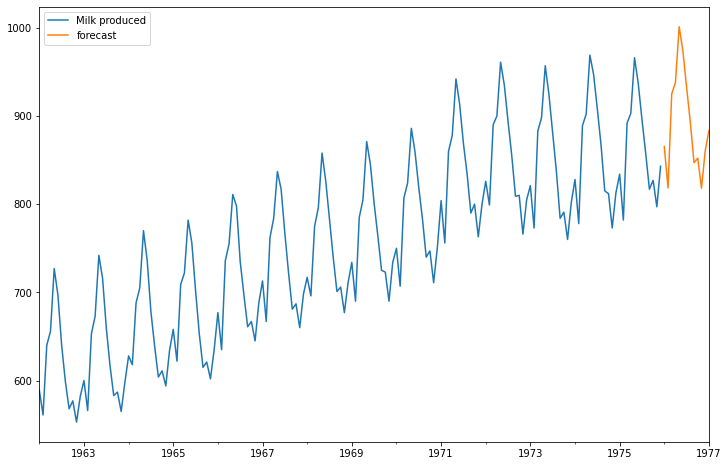

In [ ]:
future_df['forecast'] = results.predict(start = 168, end = 180,dynamic= True)
future_df[['Milk produced', 'forecast']].plot(figsize = (12, 8))